In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/immunity.py
%run ../Scripts/initMethods.py

In [15]:
params = { #parameters relevant for the equations
    "Nh":           10000000,
    "N0":           10000000,
    "M":                1, #Also L, total number of spacers
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "initial_mean_n":           [0,-40],
    "initial_var_n":               10,
    "initial_mean_nh":         [0,40],
    "initial_var_nh":              10,
    "num_threads":                  32,
    "tail_axis":               [1, 1],
    }

In [3]:
nh = init_guassian(params["Nh"], sim_params, "nh")

n = init_guassian(params["N0"], sim_params, "n")

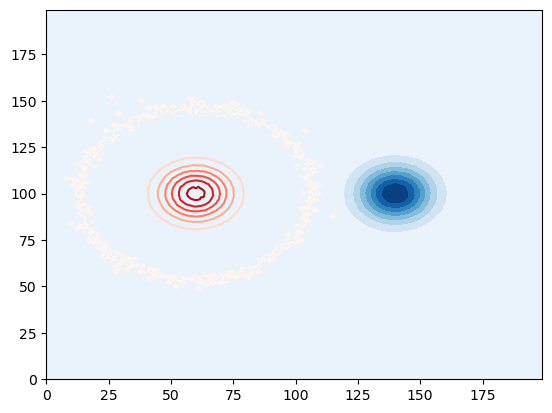

In [7]:
plt.contour(nh.todense(), cmap="Reds")
plt.contourf(n.todense(), cmap="Blues")
plt.show()

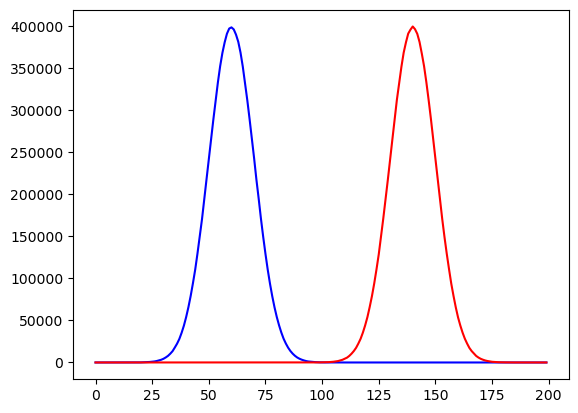

In [8]:
flat_nh = np.array(np.sum(nh.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, color = "blue")
plt.plot(flat_n, color = "red")

In [6]:
old_ratio = np.sum(flat_n)/np.sum(flat_nh)
old_ratio

1.0

In [8]:
nh_new_old = immunity_update(nh, n, params, sim_params)

immunity_update took 00:00:25


In [7]:
nh_new = immunity_update_split_choice(nh, n, params, sim_params)

immunity_update_split_choice took 00:00:16


In [23]:
%run ../Scripts/immunity.py
nh_new= immunity_mean_field(nh, n, params, sim_params)

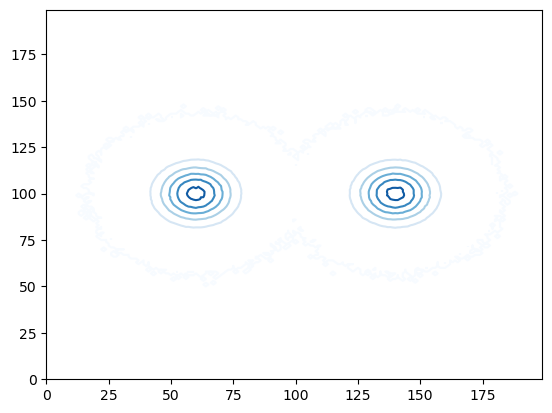

In [24]:
plt.contour(nh_new_mean.todense(), cmap = "Blues")

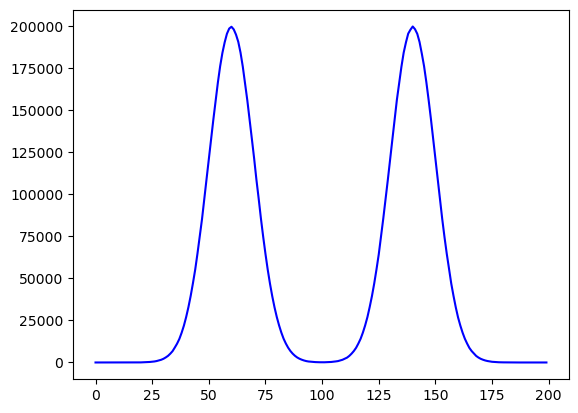

In [25]:
flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
plt.plot(flat_nh_new, color = "blue")

In [26]:
np.sum(flat_nh_new)

10000000.0

In [27]:
new_ratio = np.sum(flat_nh_new[100:-1])/np.sum(flat_nh_new[0:100])
new_ratio

0.9999328022578441

In [28]:
loss = np.sum(flat_nh_new[0:100])/np.sum(flat_nh)
gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
print("rate of loss:", loss)
print("rate of gain:", gain)

rate of loss: 0.5000168
rate of gain: 0.4999832


In [91]:
import sys

In [92]:
num = 100
gain_data = np.zeros(num)

dummy_out = sys.stdout
sys.stdout = None
for i in range(num):
    nh_new = immunity_update(nh, n, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
    gain_data[i] = gain
sys.stdout = dummy_out

In [93]:
print("mean rate of gain:", np.mean(gain_data))
print("variance:", np.var(gain_data))

mean rate of gain: 0.500146
variance: 1.1724883999999998e-05


In [94]:
num = 100
gain_data = np.zeros(num)

dummy_out = sys.stdout
sys.stdout = None
for i in range(num):
    nh_new = immunity_update_split_choice(nh, n, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
    gain_data[i] = gain
sys.stdout = dummy_out

In [95]:
print("New mean rate of gain:", np.mean(gain_data))
print("New variance:", np.var(gain_data))

New mean rate of gain: 0.499917
New variance: 2.4361099999999256e-07
